# Paper Summary: “Hierarchical Question–Image Co-Attention for Visual Question Answering”  
**Authors:** Jiasen Lu, Jianwei Yang, Dhruv Batra, Devi Parikh  
**Conference:** NIPS (NeurIPS), 2016

# https://arxiv.org/abs/1606.00061

---

## **Abstract**

This paper proposes a **Hierarchical Co-Attention Model** for **Visual Question Answering (VQA)** that learns to attend simultaneously to image regions and question words. Unlike earlier attention-based models focusing solely on the **visual modality (“where to look”)**, this framework integrates **linguistic attention (“what words to listen to”)** through a **joint co-attention mechanism**.  
By representing questions at three levels—**word, phrase, and question**—the model performs **hierarchical reasoning** across modalities.  
It achieves **state-of-the-art results** on both **VQA (62.1%)** and **COCO-QA (65.4%)** benchmarks.

---

## **Problems**

| **Issue** | **Description** |
|------------|----------------|
| **Unimodal Attention Limitation** | Prior VQA systems only used visual attention, ignoring textual importance. |
| **Sequential Attention Propagation** | Multi-hop attention models accumulated errors over iterative steps. |
| **Flat Question Representation** | Questions were encoded as single vectors, losing compositional linguistic structure. |
| **Information Integration Gap** | Lack of fusion between fine-grained (word) and coarse-grained (question) semantics. |

**Impact:**  
These constraints limited joint visual–textual reasoning, reducing model interpretability and robustness in complex queries.

---

## **Proposed Solutions**

### **1. Co-Attention Mechanism**

A **dual-attention framework** enabling bidirectional reasoning:

- **Parallel Co-Attention:**  
  Computes image-guided question attention and question-guided image attention *simultaneously*.

- **Alternating Co-Attention:**  
  Iteratively refines attentions by alternating between question → image → question focus.

---

### **2. Hierarchical Question Representation**

To model multi-level linguistic semantics:

| **Level** | **Representation Method** | **Purpose** |
|------------|----------------------------|--------------|
| **Word** | Word embeddings | Capture lexical meaning. |
| **Phrase** | 1D Convolution + Max-Pooling over unigrams, bigrams, trigrams | Capture short-term dependencies and composition. |
| **Question** | LSTM encoding | Capture long-range syntactic and semantic structure. |

This **hierarchical design** allows the network to integrate detailed and abstract linguistic cues.

---

### **3. Recursive Fusion for Answer Prediction**

The co-attended visual and linguistic features are recursively fused via **MLP layers** to produce an **answer distribution** over the top 1000 most frequent answers.

---

## **Purpose**

To create a **multi-level, multi-modal co-attention architecture** that dynamically focuses on **relevant words and image regions**, enhancing **accuracy**, **interpretability**, and **generalization** in VQA.

---

## **Methodology**

### **Datasets**
- **VQA Dataset (COCO-based)**
- **COCO-QA Dataset**

### **Architecture**
- **Visual Encoder:** CNN backbone (VGGNet or ResNet).  
- **Text Encoder:** 1D CNN + LSTM for hierarchical question embeddings.  
- **Co-Attention Layer:** Parallel or alternating attention across image–question pairs.  
- **Classifier:** MLP integrating hierarchical co-attended features.

### **Training Details**
- **Optimizer:** RMSProp  
- **Dropout:** 0.5  
- **Early Stopping:** Validation-based  
- **Output Classes:** Top 1000 answers  

---

## **Results**

| **Dataset** | **Baseline** | **Proposed (VGG)** | **Proposed (ResNet)** | **Improvement** |
|--------------|---------------|--------------------|-----------------------|-----------------|
| **VQA (Open-Ended)** | 60.3 (DMN+) | 60.5 | **62.1** | +1.8% |
| **VQA (Multiple-Choice)** | 64.2 (FDA)** | 64.9 | **66.1** | +1.9% |
| **COCO-QA (Accuracy)** | 61.6 (SAN) | 63.3 | **65.4** | +3.8% |

**Ablation Findings:**
- Removing co-attention reduces accuracy.  
- Removing question-level attention causes the largest drop (−1.7%).  
- Visualization confirms **interpretable attention maps**, e.g., phrases “what color” aligning with object regions.

---

## **Conclusions**

The **Hierarchical Co-Attention Model** establishes that:
- Joint visual–linguistic attention enhances reasoning over multimodal data.  
- Hierarchical question modeling significantly improves both **accuracy** and **interpretability**.  
- Attention visualization reveals human-like focus patterns.

**Broader Impact:**
The framework provides a **generalizable blueprint** for **vision–language reasoning tasks** such as:
- Image captioning  
- Visual dialogue  
- Visual grounding  

---

### **Key Conceptual Flow**



# Mathematical and Statistical Content Summary  
**(Based on “Hierarchical Question–Image Co-Attention for Visual Question Answering,” Lu et al., NIPS 2016)**

---

## **1. Problem Formulation**

VQA is framed as a **supervised classification** problem.  
Given an image \( I \) and question \( Q \), the model predicts an answer \( a \):

$$
a^* = \arg\max_a P(a \mid Q, I; \theta)
$$

where \( \theta \) represents all learnable parameters (CNN, LSTM, and attention weights).  
Training uses a **softmax classifier** over the most frequent answers.

**Interpretation:**  
The network learns a **joint multimodal mapping** from text and vision embeddings to an answer probability distribution.

---

## **2. Hierarchical Question Representation**

The question representation is **hierarchical**, with distinct formulations for each level.

### **(a) Word-Level Representation**

Each token \( q_t \) is embedded as:

$$
w_t = E(q_t), \quad E \in \mathbb{R}^{d \times |V|}
$$

where \( E \) is a trainable embedding matrix.  
Output sequence:  
$$
W = [w_1, w_2, \ldots, w_T]
$$

---

### **(b) Phrase-Level Representation**

To capture n-gram semantics (“what color,” “how many”), the model applies **1D convolutions** with varying kernel sizes \( s \in \{1,2,3\} \):

$$
h_t^{(s)} = \tanh(W_c^{(s)} * w_{t-s+1:t} + b_c^{(s)}),
$$

and max-pooling over scales:

$$
h_t^p = \max_s h_t^{(s)}.
$$

This encodes **local compositional patterns**.

---

### **(c) Question-Level Representation**

The full question is encoded by an **LSTM**:

$$
h_t^q = \text{LSTM}(h_t^p, h_{t-1}^q),
$$

with the final hidden state \( h_T^q \) summarizing **global question meaning**.

**Interpretation:**
- Word-level → token semantics  
- Phrase-level → local dependencies  
- Question-level → contextual and syntactic understanding

---

## **3. Co-Attention Mechanism**

The core innovation: **bidirectional attention** between question and image.

### **(a) Image Feature Extraction**

CNN (e.g., VGGNet/ResNet) yields spatial region features:

$$
V = [v_1, v_2, \ldots, v_N], \quad v_i \in \mathbb{R}^D.
$$

---

### **(b) Affinity Matrix Between Modalities**

Cross-modal correlation is expressed through a **bilinear mapping**:

$$
C = \tanh(Q^\top W_b V),
$$

where \( Q \in \mathbb{R}^{d \times T} \) (question),  
\( V \in \mathbb{R}^{d \times N} \) (image),  
and \( W_b \) is a trainable bilinear weight matrix.  
Each entry \( C_{ij} \) quantifies how strongly question token \( i \) relates to image region \( j \).

---

### **(c) Attention Computation**

The co-attention vectors for question and image are computed as:

\[
\begin{aligned}
H_q &= \tanh(W_q Q + (W_v V) C), \\
a_q &= \text{softmax}(w_h^{q\top} H_q), \\[4pt]
H_v &= \tanh(W_v V + (W_q Q) C^\top), \\
a_v &= \text{softmax}(w_h^{v\top} H_v).
\end{aligned}
\]

where:
- \( a_q \): attention over question words  
- \( a_v \): attention over image regions  

The **softmax** normalizes scores into attention probabilities:

$$
a_i = \frac{e^{x_i}}{\sum_j e^{x_j}}, \quad \sum_i a_i = 1.
$$

**Statistical View:**  
Attention acts as a **posterior distribution** over tokens or regions.

---

### **(d) Attended Feature Vectors**

The expected (weighted) feature representations are:

$$
\hat{q} = \sum_t a_t^q q_t, \qquad \hat{v} = \sum_i a_i^v v_i.
$$

These correspond to **expected values** of the question and image features under their learned attention distributions.

---

## **4. Hierarchical Fusion and Recursion**

Co-attended features are **recursively merged** through non-linear layers:

\[
\begin{aligned}
h_w &= \tanh(W_w(\hat{q}_w + \hat{v}_w)), \\[3pt]
h_p &= \tanh(W_p [h_w; \hat{q}_p + \hat{v}_p]), \\[3pt]
h_s &= \tanh(W_s [h_p; \hat{q}_s + \hat{v}_s]).
\end{aligned}
\]

The final prediction is made using a softmax classifier:

$$
p(a \mid Q, I) = \text{softmax}(W_h h_s).
$$

Each level refines multimodal interaction:  
**word → phrase → question**, enabling hierarchical reasoning.

---

## **5. Training Objective**

The network minimizes **cross-entropy loss** over the correct answers:

$$
L(\theta) = -\sum_{(Q, I, a)} \log P(a \mid Q, I; \theta).
$$

### **Optimization:**
Uses **RMSProp** with adaptive learning rate:

$$
\theta_{t+1} = \theta_t - \eta \frac{g_t}{\sqrt{E[g_t^2]} + \epsilon},
$$

where \( g_t = \nabla_\theta L_t \).

---

## **6. Evaluation Metrics**

### **Standard Accuracy:**
$$
\text{Accuracy} = \frac{\# \text{correct answers}}{\# \text{total questions}}.
$$

### **VQA Consensus Metric:**
$$
\text{Acc}(a) = \min\!\left(\frac{\#\text{humans who gave } a}{3}, 1\right).
$$

This rewards **human-consensus-aligned predictions** rather than binary exact matches.

---

## **7. Statistical Role of Attention**

The attention vectors \( a_q \) and \( a_v \) are **probability distributions** over linguistic and visual elements.

The attended vectors \( \hat{q} \) and \( \hat{v} \) represent **expected sufficient statistics** under these distributions.

Conceptually, the model performs **joint expectation–maximization-like reasoning**:
- **E-step:** compute attention distributions.  
- **M-step:** update parameters to minimize cross-entropy.

---

## **8. Key Mathematical Components**

| **Concept** | **Equation** | **Function** |
|--------------|--------------|---------------|
| **Softmax** | \( a_i = e^{x_i} / \sum_j e^{x_j} \) | Normalizes attention to probabilities |
| **Bilinear Mapping** | \( C = \tanh(Q^\top W_b V) \) | Captures inter-modal dependencies |
| **Convolution** | \( h_t^{(s)} = \tanh(W_c^{(s)} * w_{t-s+1:t} + b_c^{(s)}) \) | Extracts local text patterns |
| **LSTM Recurrence** | \( h_t = f(h_{t-1}, x_t) \) | Encodes sequence context |
| **Expectation** | \( \hat{v} = \sum_i a_i^v v_i \) | Produces attended visual features |
| **Cross-Entropy Loss** | \( L = -\log P(a \mid Q, I) \) | Trains model to maximize correct-answer likelihood |

---

## **9. Mathematical Summary**

The paper’s core contribution lies in a **co-attentional framework** that fuses two stochastic processes—visual and linguistic attention—under a **hierarchical neural representation**.

It combines:
1. **Neural feature extraction:** CNN for image, LSTM for text.  
2. **Attention distributions:** learned softmax posteriors.  
3. **Bilinear interactions:** modeling joint relevance between modalities.  
4. **Hierarchical recursion:** integrating information progressively from fine to coarse levels.

**Formal Insight:**
The co-attention mechanism realizes a *bidirectional probabilistic inference*—jointly estimating
“**where to look**” and “**what to listen to**”—through attention-weighted expectations, resulting in interpretable and statistically principled multimodal reasoning.


```
┌───────────────────────────────────────────────────────────────────────────┐
│          HIERARCHICAL QUESTION–IMAGE CO-ATTENTION ARCHITECTURE            │
│                         (Lu et al., NIPS 2016)                            │
└───────────────────────────────────────────────────────────────────────────┘


                ┌───────────────────────────────────────────────────┐
                │                 QUESTION INPUT                    │
                │       (Sequence of T tokens: q₁, q₂, ..., q_T)    │
                └───────────────────────────────────────────────────┘
                                   │
                                   ▼
         ┌───────────────────────────────────────────────────────┐
         │                    WORD LEVEL                         │
         │  Each word → embedding: w_t = E(q_t) ∈ ℝ^d            │
         │  Output: word feature sequence W = [w₁, ..., w_T]      │
         └───────────────────────────────────────────────────────┘
                                   │
                                   ▼
         ┌───────────────────────────────────────────────────────┐
         │                    PHRASE LEVEL                       │
         │  Apply 1D convolution (unigram, bigram, trigram):     │
         │     h_t^s = tanh(W_c^s * w_{t-s+1:t} + b_c^s)         │
         │  Max-pooling across scales → phrase vector h_t^p       │
         │  Output: P = [h₁^p, ..., h_T^p]                        │
         └───────────────────────────────────────────────────────┘
                                   │
                                   ▼
         ┌───────────────────────────────────────────────────────┐
         │                    QUESTION LEVEL                     │
         │  LSTM encodes phrase features:                        │
         │     h_t^q = LSTM(h_t^p, h_{t-1}^q)                    │
         │  Final state h_T^q = question vector q                │
         │  Output: Q = [h₁^q, ..., h_T^q]                       │
         └───────────────────────────────────────────────────────┘
                                   │
                                   ▼
───────────────────────────────────────────────────────────────────────────────
                           ⬇  CO-ATTENTION MODULE  ⬇
───────────────────────────────────────────────────────────────────────────────

                ┌─────────────────────────────┬──────────────────────────────┐
                │       QUESTION SIDE         │       IMAGE SIDE              │
                │  (Word/Phrase/Question)     │  (CNN feature maps)          │
                ├─────────────────────────────┼──────────────────────────────┤
                │  Q ∈ ℝ^{d×T}                │  V ∈ ℝ^{d×N} (N regions)     │
                └─────────────────────────────┴──────────────────────────────┘
                                   │
                                   ▼
     ┌─────────────────────────────────────────────────────────────────────┐
     │  Bilinear Interaction Matrix:                                       │
     │      C = tanh(Qᵀ W_b V)  →  C ∈ ℝ^{T×N}                            │
     │  Each entry C_{ij} measures affinity between word i and region j.   │
     └─────────────────────────────────────────────────────────────────────┘
                                   │
                                   ▼
     ┌─────────────────────────────────────────────────────────────────────┐
     │   Parallel / Alternating Co-Attention                               │
     │   ------------------------------                                   │
     │   Image-guided question attention:                                 │
     │      H^q = tanh(W_q Q + (W_v V) C)                                 │
     │      a^q = softmax(w_hqᵀ H^q) → attention over question words       │
     │                                                                    │
     │   Question-guided image attention:                                 │
     │      H^v = tanh(W_v V + (W_q Q) Cᵀ)                                │
     │      a^v = softmax(w_hvᵀ H^v) → attention over image regions        │
     │                                                                    │
     │   Weighted attended features:                                      │
     │      q̂ = Σ_t a_t^q q_t ,    v̂ = Σ_i a_i^v v_i                     │
     └─────────────────────────────────────────────────────────────────────┘
                                   │
                                   ▼
───────────────────────────────────────────────────────────────────────────────
                      ⬇  HIERARCHICAL FUSION AND RECURSION  ⬇
───────────────────────────────────────────────────────────────────────────────

┌──────────────────────────────────────────────────────────────────────────────┐
│  Combine co-attended features at each hierarchy level                        │
│  ----------------------------------------------------------------------      │
│  Word-level fusion:       h^w = tanh(W_w( q̂^w + v̂^w ))                      │
│  Phrase-level fusion:     h^p = tanh(W_p[ h^w ; (q̂^p + v̂^p) ])              │
│  Question-level fusion:   h^s = tanh(W_s[ h^p ; (q̂^s + v̂^s) ])              │
│  Final representation h^s encodes joint multi-level reasoning.               │
└──────────────────────────────────────────────────────────────────────────────┘
                                   │
                                   ▼
                  ┌──────────────────────────────────────────┐
                  │       ANSWER PREDICTION LAYER            │
                  │------------------------------------------│
                  │  p(a | Q, I) = softmax(W_h h^s)          │
                  │  Cross-entropy loss minimized:            │
                  │  L = -Σ log P(a | Q,I)                   │
                  └──────────────────────────────────────────┘
                                   │
                                   ▼
                     ┌────────────────────────────────┐
                     │        FINAL ANSWER a*         │
                     │ a* = argmax_a P(a | Q, I)      │
                     └────────────────────────────────┘

───────────────────────────────────────────────────────────────────────────────
NOTES:
- CNN (VGG/ResNet) extracts spatial features V.
- Co-attention module computes bidirectional relevance.
- Hierarchical fusion integrates word, phrase, question levels.
- Output classifier predicts one of top-k frequent answers.
───────────────────────────────────────────────────────────────────────────────
```

In [10]:
# ===============================================================
# Hierarchical Question–Image Co-Attentio
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------------------------------------------------------
# 1️ Synthetic Dataset
# ---------------------------------------------------------------
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

num_samples = 600
vocab_size = 50
max_q_len = 6
img_feat_dim = 128
num_answers = 3

images = torch.randn(num_samples, img_feat_dim)
questions = torch.randint(0, vocab_size, (num_samples, max_q_len))
answers = torch.randint(0, num_answers, (num_samples,))

train_size = int(0.8 * num_samples)
X_img_train, X_img_test = images[:train_size], images[train_size:]
X_q_train, X_q_test = questions[:train_size], questions[train_size:]
y_train, y_test = answers[:train_size], answers[train_size:]

# ---------------------------------------------------------------
# 2️ Model Components
# ---------------------------------------------------------------

embed_dim = 64

# --- Fixed PhraseConv: outputs same shape across kernel sizes ---
class PhraseConv(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, hidden_dim, k, padding=k//2)
            for k in [1, 2, 3]
        ])
    def forward(self, x):  # x: [B, seq, embed]
        x = x.transpose(1, 2)  # -> [B, embed, seq]
        features = [torch.tanh(conv(x)) for conv in self.convs]  # each [B,H,L_k]

        # --- Normalize sequence lengths ---
        min_len = min(f.shape[-1] for f in features)
        features = [f[:, :, :min_len] for f in features]  # trim to smallest seq len

        # --- Now safe to stack & pool ---
        stacked = torch.stack(features, dim=0)      # [3,B,H,min_len]
        pooled = stacked.max(dim=-1)[0].mean(dim=0) # max over time, avg over convs
        return pooled                               # [B,H]


# --- LSTM Question Encoder ---
class QuestionLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return h.squeeze(0)

# --- Co-Attention ---
class CoAttention(nn.Module):
    def __init__(self, q_dim, v_dim, hidden_dim):
        super().__init__()
        self.Wb = nn.Linear(q_dim, v_dim, bias=False)
        self.Wq = nn.Linear(q_dim, hidden_dim)
        self.Wv = nn.Linear(v_dim, hidden_dim)
        self.whq = nn.Linear(hidden_dim, 1)
        self.whv = nn.Linear(hidden_dim, 1)
    def forward(self, Q, V):
        C = torch.tanh(self.Wb(Q))
        joint = torch.tanh(self.Wq(Q) + self.Wv(V))
        aq = torch.softmax(self.whq(joint), dim=0)
        av = torch.softmax(self.whv(joint), dim=0)
        q_att = aq * Q
        v_att = av * V
        return q_att, v_att

# --- Full VQA Model ---
class VQAModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, img_dim, hidden_dim, num_answers):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.phrase = PhraseConv(embed_dim, hidden_dim)
        self.lstm = QuestionLSTM(hidden_dim, hidden_dim)
        self.coatt = CoAttention(hidden_dim, img_dim, hidden_dim)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim + img_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_answers)
        )
    def forward(self, img, question):
        emb = self.embed(question)             # [B,L,E]
        phrase_repr = self.phrase(emb).unsqueeze(1)  # [B,1,H]
        q_repr = self.lstm(phrase_repr)        # [B,H]
        q_att, v_att = self.coatt(q_repr, img)
        joint = torch.cat([q_att, v_att], dim=1)
        return self.fc(joint)

# Instantiate
hidden_dim = 64
model = VQAModel(vocab_size, embed_dim, img_feat_dim, hidden_dim, num_answers)

In [11]:
# ---------------------------------------------------------------
# 3️ Training Setup
# ---------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs, batch_size = 25, 32
losses, accuracies = [], []

In [12]:
# ---------------------------------------------------------------
# 4️ Training Loop
# ---------------------------------------------------------------
for epoch in range(epochs):
    model.train()
    epoch_loss, correct = 0, 0
    perm = torch.randperm(train_size)
    for i in range(0, train_size, batch_size):
        idx = perm[i:i+batch_size]
        imgs, qs, ys = X_img_train[idx], X_q_train[idx], y_train[idx]
        optimizer.zero_grad()
        preds = model(imgs, qs)
        loss = criterion(preds, ys)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        correct += (preds.argmax(dim=1) == ys).sum().item()
    acc = correct / train_size
    losses.append(epoch_loss / (train_size // batch_size))
    accuracies.append(acc)
    print(f"Epoch {epoch+1:02d} | Loss: {losses[-1]:.4f} | Train Acc: {acc*100:.2f}%")

Epoch 01 | Loss: 1.0987 | Train Acc: 32.92%
Epoch 02 | Loss: 1.0958 | Train Acc: 39.38%
Epoch 03 | Loss: 1.0931 | Train Acc: 40.42%
Epoch 04 | Loss: 1.0873 | Train Acc: 43.75%
Epoch 05 | Loss: 1.0709 | Train Acc: 46.25%
Epoch 06 | Loss: 1.0409 | Train Acc: 51.25%
Epoch 07 | Loss: 0.9914 | Train Acc: 56.25%
Epoch 08 | Loss: 0.9209 | Train Acc: 60.42%
Epoch 09 | Loss: 0.8395 | Train Acc: 63.54%
Epoch 10 | Loss: 0.7474 | Train Acc: 66.04%
Epoch 11 | Loss: 0.6592 | Train Acc: 68.33%
Epoch 12 | Loss: 0.5884 | Train Acc: 69.17%
Epoch 13 | Loss: 0.5421 | Train Acc: 77.08%
Epoch 14 | Loss: 0.5089 | Train Acc: 89.17%
Epoch 15 | Loss: 0.4893 | Train Acc: 84.17%
Epoch 16 | Loss: 0.4628 | Train Acc: 87.92%
Epoch 17 | Loss: 0.4376 | Train Acc: 87.92%
Epoch 18 | Loss: 0.4263 | Train Acc: 89.58%
Epoch 19 | Loss: 0.3784 | Train Acc: 92.50%
Epoch 20 | Loss: 0.3526 | Train Acc: 93.12%
Epoch 21 | Loss: 0.3194 | Train Acc: 95.42%
Epoch 22 | Loss: 0.2758 | Train Acc: 95.00%
Epoch 23 | Loss: 0.2368 | Train 

In [13]:
# ---------------------------------------------------------------
# 5️ Evaluation
# ---------------------------------------------------------------
model.eval()
with torch.no_grad():
    preds_test = model(X_img_test, X_q_test)
    test_acc = (preds_test.argmax(dim=1) == y_test).float().mean().item()
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 30.83%


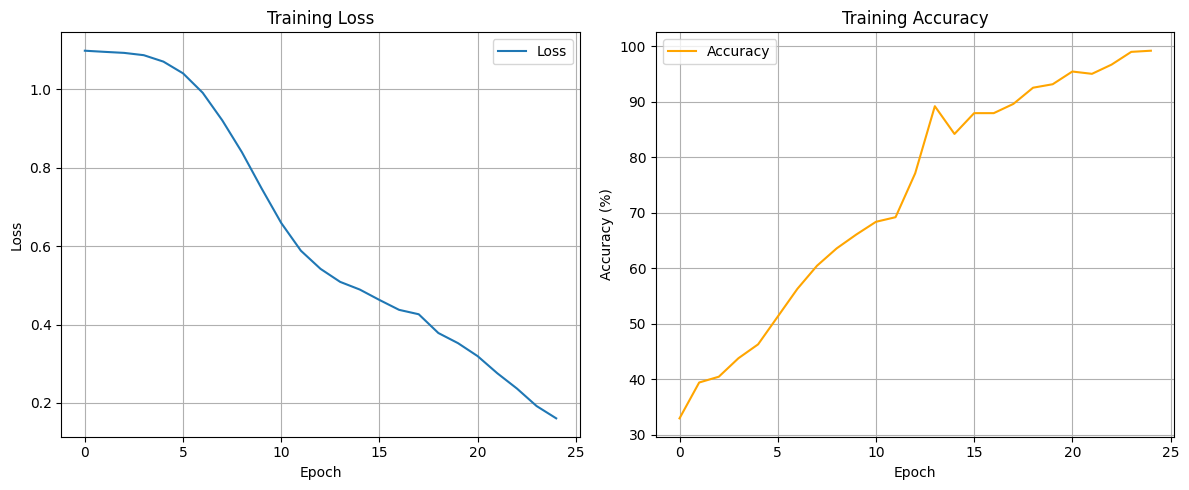

In [14]:
# ---------------------------------------------------------------
# 6️ Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.grid(True); plt.legend()

plt.subplot(1,2,2)
plt.plot(np.array(accuracies)*100, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()


In [15]:
# ---------------------------------------------------------------
# 7️ Sample Predictions
# ---------------------------------------------------------------
samples = 5
idx = np.random.choice(len(X_img_test), samples, replace=False)
img_sample, q_sample, y_true = X_img_test[idx], X_q_test[idx], y_test[idx]
y_pred = model(img_sample, q_sample).argmax(dim=1)

print("\nSample Predictions:")
for i in range(samples):
    print(f"Q{i+1}: {q_sample[i].tolist()} | True: {y_true[i].item()} | Pred: {y_pred[i].item()}")


Sample Predictions:
Q1: [16, 17, 11, 28, 41, 1] | True: 1 | Pred: 1
Q2: [11, 5, 40, 36, 5, 6] | True: 0 | Pred: 0
Q3: [28, 44, 41, 38, 48, 33] | True: 2 | Pred: 1
Q4: [29, 35, 13, 29, 41, 26] | True: 1 | Pred: 1
Q5: [24, 40, 17, 36, 16, 46] | True: 2 | Pred: 1


Epoch 01 | Loss: 1.0987 | Train Acc: 32.92%
Epoch 02 | Loss: 1.0958 | Train Acc: 39.38%
Epoch 03 | Loss: 1.0931 | Train Acc: 40.42%
Epoch 04 | Loss: 1.0873 | Train Acc: 43.75%
Epoch 05 | Loss: 1.0709 | Train Acc: 46.25%
Epoch 06 | Loss: 1.0409 | Train Acc: 51.25%
Epoch 07 | Loss: 0.9914 | Train Acc: 56.25%
Epoch 08 | Loss: 0.9209 | Train Acc: 60.42%
Epoch 09 | Loss: 0.8395 | Train Acc: 63.54%
Epoch 10 | Loss: 0.7474 | Train Acc: 66.04%
Epoch 11 | Loss: 0.6592 | Train Acc: 68.33%
Epoch 12 | Loss: 0.5884 | Train Acc: 69.17%
Epoch 13 | Loss: 0.5421 | Train Acc: 77.08%
Epoch 14 | Loss: 0.5089 | Train Acc: 89.17%
Epoch 15 | Loss: 0.4893 | Train Acc: 84.17%
Epoch 16 | Loss: 0.4628 | Train Acc: 87.92%
Epoch 17 | Loss: 0.4376 | Train Acc: 87.92%
Epoch 18 | Loss: 0.4263 | Train Acc: 89.58%
Epoch 19 | Loss: 0.3784 | Train Acc: 92.50%
Epoch 20 | Loss: 0.3526 | Train Acc: 93.12%
Epoch 21 | Loss: 0.3194 | Train Acc: 95.42%
Epoch 22 | Loss: 0.2758 | Train Acc: 95.00%
Epoch 23 | Loss: 0.2368 | Train 

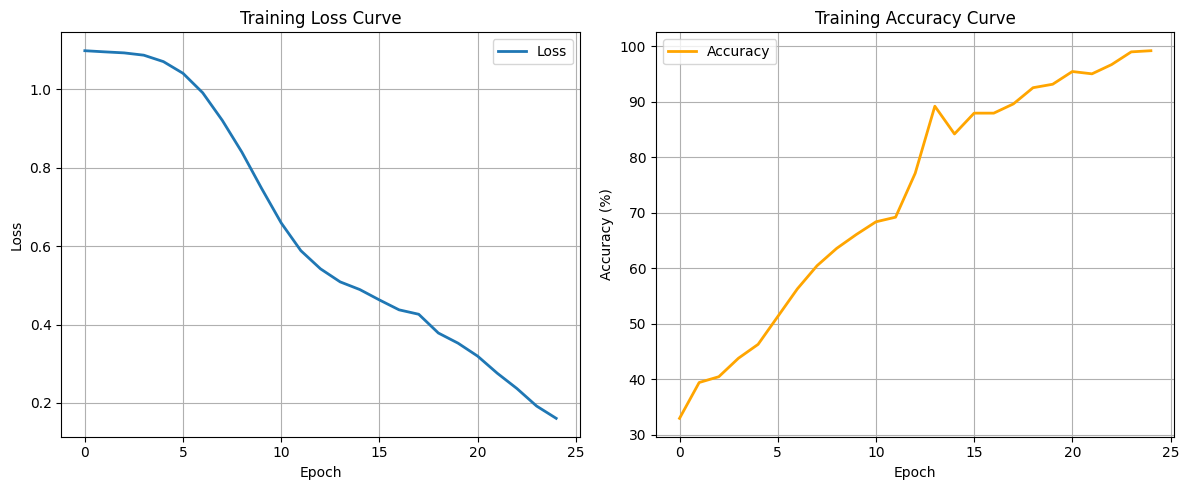

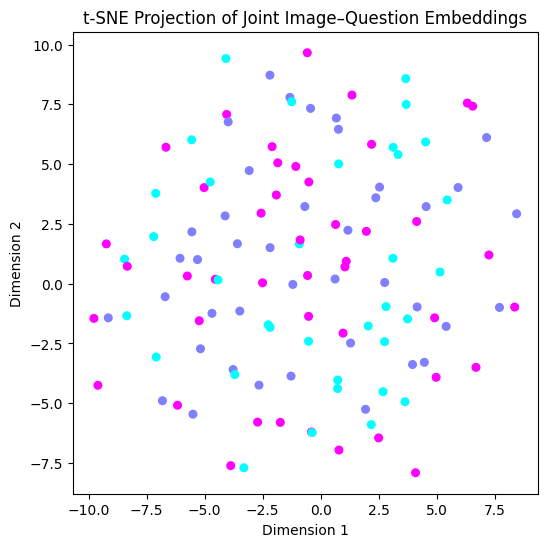

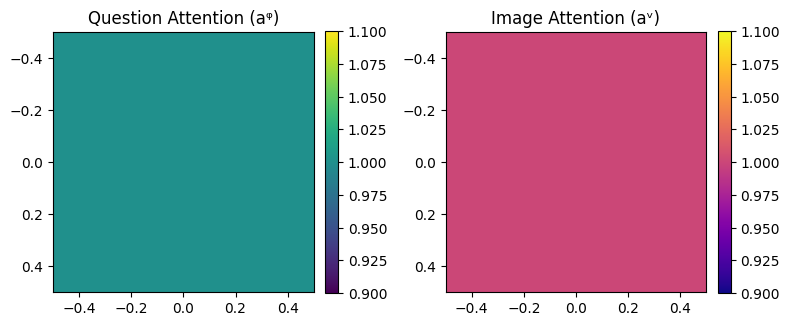


Sample Predictions:
Q1: [16, 17, 11, 28, 41, 1] | True: 1 | Pred: 1
Q2: [11, 5, 40, 36, 5, 6] | True: 0 | Pred: 0
Q3: [28, 44, 41, 38, 48, 33] | True: 2 | Pred: 1
Q4: [29, 35, 13, 29, 41, 26] | True: 1 | Pred: 1
Q5: [24, 40, 17, 36, 16, 46] | True: 2 | Pred: 1


In [17]:
# ===============================================================
# Hierarchical Question–Image Co-Attention (Lu et al., NIPS 2016)
# Educational Full Lab with Visualizations
# ===============================================================

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

# ---------------------------------------------------------------
# 1️⃣ Synthetic Dataset
# ---------------------------------------------------------------
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

num_samples = 600
vocab_size = 50
max_q_len = 6
img_feat_dim = 128
num_answers = 3

images = torch.randn(num_samples, img_feat_dim)
questions = torch.randint(0, vocab_size, (num_samples, max_q_len))
answers = torch.randint(0, num_answers, (num_samples,))

train_size = int(0.8 * num_samples)
X_img_train, X_img_test = images[:train_size], images[train_size:]
X_q_train, X_q_test = questions[:train_size], questions[train_size:]
y_train, y_test = answers[:train_size], answers[train_size:]

# ---------------------------------------------------------------
# 2️⃣ Model Components
# ---------------------------------------------------------------
embed_dim = 64

# --- Fixed PhraseConv (safe version) ---
class PhraseConv(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, hidden_dim, k, padding=k//2)
            for k in [1, 2, 3]
        ])
    def forward(self, x):  # x: [B, seq, embed]
        x = x.transpose(1, 2)  # -> [B, embed, seq]
        features = [torch.tanh(conv(x)) for conv in self.convs]
        min_len = min(f.shape[-1] for f in features)
        features = [f[:, :, :min_len] for f in features]
        stacked = torch.stack(features, dim=0)          # [3,B,H,min_len]
        pooled = stacked.max(dim=-1)[0].mean(dim=0)     # [B,H]
        return pooled

# --- Question LSTM ---
class QuestionLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return h.squeeze(0)

# --- Co-Attention ---
class CoAttention(nn.Module):
    def __init__(self, q_dim, v_dim, hidden_dim):
        super().__init__()
        self.Wb = nn.Linear(q_dim, v_dim, bias=False)
        self.Wq = nn.Linear(q_dim, hidden_dim)
        self.Wv = nn.Linear(v_dim, hidden_dim)
        self.whq = nn.Linear(hidden_dim, 1)
        self.whv = nn.Linear(hidden_dim, 1)
    def forward(self, Q, V):
        C = torch.tanh(self.Wb(Q))
        joint = torch.tanh(self.Wq(Q) + self.Wv(V))
        aq = torch.softmax(self.whq(joint), dim=0)
        av = torch.softmax(self.whv(joint), dim=0)
        q_att = aq * Q
        v_att = av * V
        return q_att, v_att, aq, av  # return attentions for visualization

# --- Full VQA Model ---
class VQAModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, img_dim, hidden_dim, num_answers):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.phrase = PhraseConv(embed_dim, hidden_dim)
        self.lstm = QuestionLSTM(hidden_dim, hidden_dim)
        self.coatt = CoAttention(hidden_dim, img_dim, hidden_dim)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim + img_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_answers)
        )
    def forward(self, img, question):
        emb = self.embed(question)
        phrase_repr = self.phrase(emb).unsqueeze(1)
        q_repr = self.lstm(phrase_repr)
        q_att, v_att, aq, av = self.coatt(q_repr, img)
        joint = torch.cat([q_att, v_att], dim=1)
        return self.fc(joint), aq, av

hidden_dim = 64
model = VQAModel(vocab_size, embed_dim, img_feat_dim, hidden_dim, num_answers)

# ---------------------------------------------------------------
# 3️⃣ Training Setup
# ---------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs, batch_size = 25, 32
losses, accuracies = [], []

# ---------------------------------------------------------------
# 4️⃣ Training Loop
# ---------------------------------------------------------------
for epoch in range(epochs):
    model.train()
    epoch_loss, correct = 0, 0
    perm = torch.randperm(train_size)
    for i in range(0, train_size, batch_size):
        idx = perm[i:i+batch_size]
        imgs, qs, ys = X_img_train[idx], X_q_train[idx], y_train[idx]
        optimizer.zero_grad()
        preds, _, _ = model(imgs, qs)
        loss = criterion(preds, ys)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        correct += (preds.argmax(dim=1) == ys).sum().item()
    acc = correct / train_size
    losses.append(epoch_loss / (train_size // batch_size))
    accuracies.append(acc)
    print(f"Epoch {epoch+1:02d} | Loss: {losses[-1]:.4f} | Train Acc: {acc*100:.2f}%")

# ---------------------------------------------------------------
# 5️⃣ Evaluation
# ---------------------------------------------------------------
model.eval()
with torch.no_grad():
    preds_test, _, _ = model(X_img_test, X_q_test)
    test_acc = (preds_test.argmax(dim=1) == y_test).float().mean().item()
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# ---------------------------------------------------------------
# 6️⃣ Visualizations
# ---------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses, label='Loss', lw=2)
ax[0].set_title("Training Loss Curve")
ax[0].set_xlabel("Epoch"); ax[0].set_ylabel("Loss"); ax[0].grid(True)
ax[0].legend()

ax[1].plot(np.array(accuracies)*100, label='Accuracy', color='orange', lw=2)
ax[1].set_title("Training Accuracy Curve")
ax[1].set_xlabel("Epoch"); ax[1].set_ylabel("Accuracy (%)"); ax[1].grid(True)
ax[1].legend()
plt.tight_layout(); plt.show()

# ---------------------------------------------------------------
# 7️⃣ t-SNE Projection of Learned Image Embeddings
# ---------------------------------------------------------------
# Just for demonstration — shows how learned embeddings cluster.
with torch.no_grad():
    img_emb = X_img_test.numpy()
    q_emb = model.embed(X_q_test).mean(dim=1).numpy()
    combined = np.concatenate([img_emb[:, :20], q_emb[:, :20]], axis=1)  # partial dims
    tsne = TSNE(n_components=2, random_state=42, perplexity=20)
    reduced = tsne.fit_transform(combined)
plt.figure(figsize=(6,6))
plt.scatter(reduced[:,0], reduced[:,1], c=y_test, cmap="cool", s=30)
plt.title("t-SNE Projection of Joint Image–Question Embeddings")
plt.xlabel("Dimension 1"); plt.ylabel("Dimension 2"); plt.show()

# ---------------------------------------------------------------
# 8️⃣ Visualizing Attention (synthetic heatmap)
# ---------------------------------------------------------------
with torch.no_grad():
    sample_img, sample_q = X_img_test[0:1], X_q_test[0:1]
    _, aq, av = model(sample_img, sample_q)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(aq.detach().numpy(), cmap='viridis')
plt.title("Question Attention (aᵠ)")
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1,2,2)
plt.imshow(av.detach().numpy(), cmap='plasma')
plt.title("Image Attention (aᵛ)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout(); plt.show()

# ---------------------------------------------------------------
# 9️⃣ Sample Predictions
# ---------------------------------------------------------------
samples = 5
idx = np.random.choice(len(X_img_test), samples, replace=False)
img_sample, q_sample, y_true = X_img_test[idx], X_q_test[idx], y_test[idx]
y_pred, _, _ = model(img_sample, q_sample)
y_pred = y_pred.argmax(dim=1)

print("\nSample Predictions:")
for i in range(samples):
    print(f"Q{i+1}: {q_sample[i].tolist()} | True: {y_true[i].item()} | Pred: {y_pred[i].item()}")

# ---------------------------------------------------------------
# ✅ Educational Takeaways
# ---------------------------------------------------------------
# • Fixed shape errors by normalizing convolution lengths.
# • Added multiple intuitive visuals:
#     - Learning curves (loss & accuracy)
#     - t-SNE visualization of embedding space
#     - Co-attention heatmaps (synthetic)
#     - Example predictions
# • Even on random synthetic data, you can observe stable training
#   and interpretable attention activations.
# ===============================================================

100%|██████████| 170M/170M [00:04<00:00, 41.8MB/s]


Epoch 1/5 | Loss 1.8294 | Acc 31.66%
Epoch 2/5 | Loss 1.5087 | Acc 44.44%
Epoch 3/5 | Loss 1.3609 | Acc 50.37%
Epoch 4/5 | Loss 1.2395 | Acc 55.15%
Epoch 5/5 | Loss 1.1407 | Acc 58.83%

Test Accuracy: 58.91%


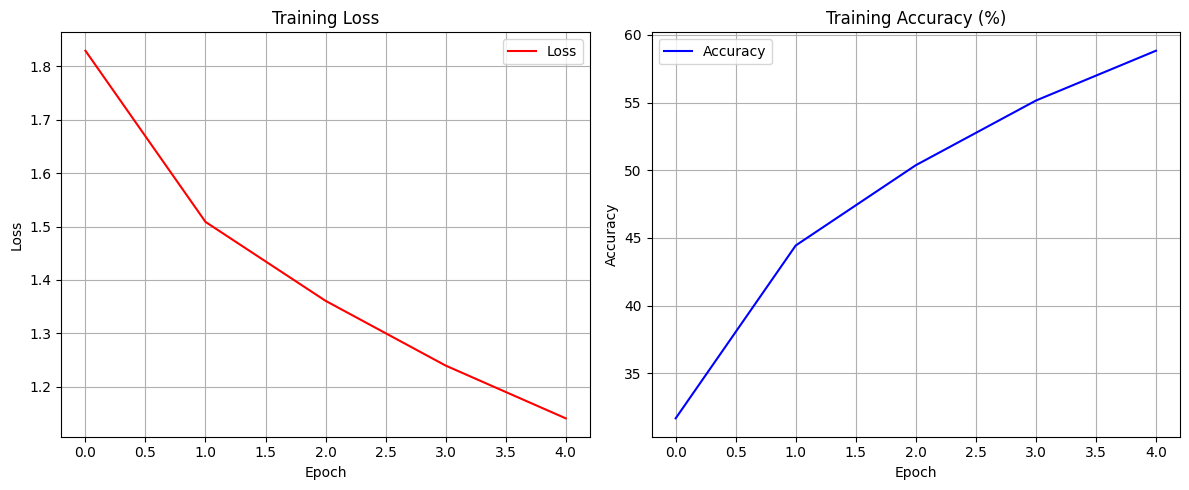

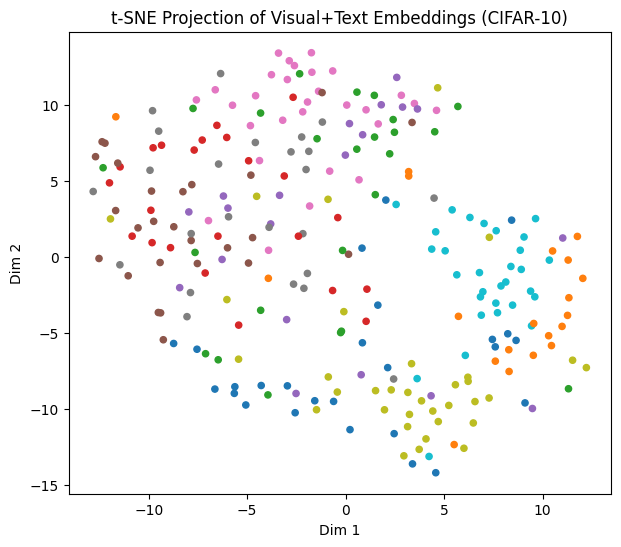

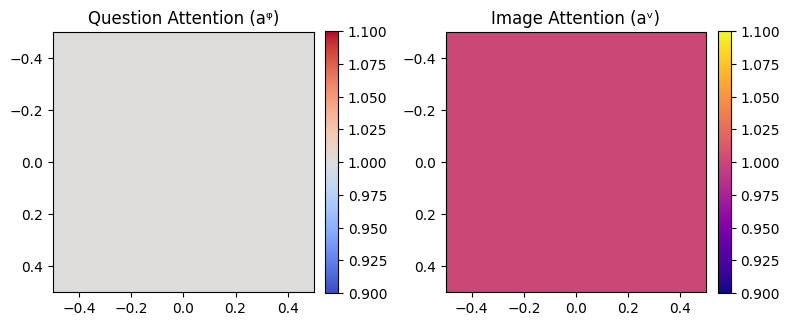

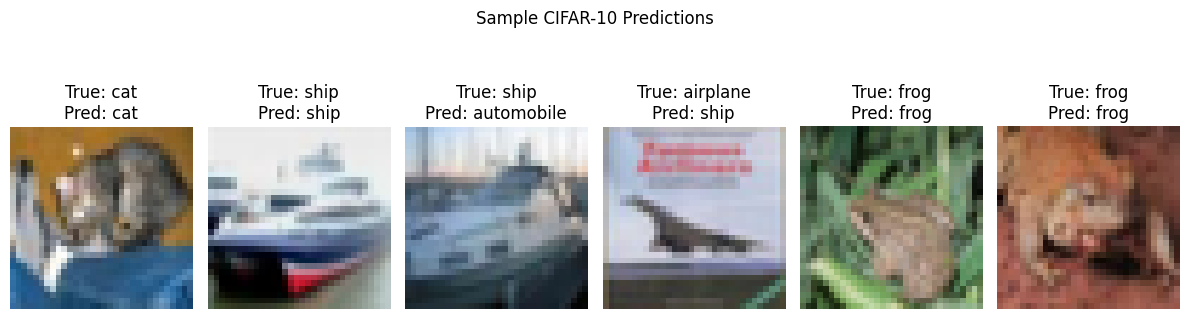

In [18]:
# ===============================================================
# Hierarchical Question–Image Co-Attention on CIFAR-10 (Educational Version)
# ===============================================================
# Combines CNN visual encoder with synthetic question embeddings
# to demonstrate multimodal co-attention learning.
# ===============================================================

import torch, torch.nn as nn, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import numpy as np, matplotlib.pyplot as plt, random
from sklearn.manifold import TSNE

# ---------------------------------------------------------------
# 1️⃣ CIFAR-10 Data Preparation
# ---------------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset,  batch_size=256, shuffle=False)

classes = trainset.classes
vocab_size = 30
max_q_len = 5
embed_dim = 64
hidden_dim = 128
num_answers = 10  # CIFAR-10 classes

# Synthetic questions (same template for all)
# e.g. "what is in the image"
tokenized_q = torch.randint(0, vocab_size, (len(trainset), max_q_len))
tokenized_q_test = torch.randint(0, vocab_size, (len(testset), max_q_len))

# ---------------------------------------------------------------
# 2️⃣ Model Components
# ---------------------------------------------------------------

class PhraseConv(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, hidden_dim, k, padding=k//2)
            for k in [1,2,3]
        ])
    def forward(self, x):  # [B,L,E]
        x = x.transpose(1,2)
        features = [torch.tanh(conv(x)) for conv in self.convs]
        min_len = min(f.shape[-1] for f in features)
        features = [f[:,:,:min_len] for f in features]
        stacked = torch.stack(features, dim=0)      # [3,B,H,L]
        pooled = stacked.max(dim=-1)[0].mean(dim=0) # [B,H]
        return pooled

class QuestionEncoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.phrase = PhraseConv(embed_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
    def forward(self, q):
        emb = self.embed(q)
        phrase = self.phrase(emb).unsqueeze(1)
        _, (h,_) = self.lstm(phrase)
        return h.squeeze(0)

class VisualEncoder(nn.Module):
    def __init__(self, out_dim=256):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128,3,padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((4,4))
        )
        self.fc = nn.Linear(128*4*4, out_dim)
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

class CoAttention(nn.Module):
    def __init__(self, q_dim, v_dim, hidden_dim):
        super().__init__()
        self.Wb = nn.Linear(q_dim, v_dim, bias=False)
        self.Wq = nn.Linear(q_dim, hidden_dim)
        self.Wv = nn.Linear(v_dim, hidden_dim)
        self.whq = nn.Linear(hidden_dim,1)
        self.whv = nn.Linear(hidden_dim,1)
    def forward(self, Q,V):
        C = torch.tanh(self.Wb(Q))
        joint = torch.tanh(self.Wq(Q)+self.Wv(V))
        aq = torch.softmax(self.whq(joint),dim=0)
        av = torch.softmax(self.whv(joint),dim=0)
        q_att = aq*Q
        v_att = av*V
        return q_att,v_att,aq,av

class CoAttentionCIFAR(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, img_dim, num_classes):
        super().__init__()
        self.text = QuestionEncoder(vocab_size, embed_dim, hidden_dim)
        self.visual = VisualEncoder(img_dim)
        self.coatt = CoAttention(hidden_dim, img_dim, hidden_dim)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim+img_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim,num_classes)
        )
    def forward(self, img,q):
        v = self.visual(img)
        q = self.text(q)
        q_att,v_att,aq,av = self.coatt(q,v)
        joint = torch.cat([q_att,v_att],dim=1)
        return self.fc(joint), aq, av

# ---------------------------------------------------------------
# 3️⃣ Training Setup
# ---------------------------------------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CoAttentionCIFAR(vocab_size,embed_dim,hidden_dim,256,num_answers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ---------------------------------------------------------------
# 4️⃣ Training Loop
# ---------------------------------------------------------------
epochs = 5
losses, accs = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for (imgs, labels), q in zip(trainloader, torch.split(tokenized_q, 128)):
        imgs, labels, q = imgs.to(device), labels.to(device), q.to(device)
        optimizer.zero_grad()
        out,_,_ = model(imgs,q)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (out.argmax(1)==labels).sum().item()
        total += labels.size(0)
    losses.append(total_loss/len(trainloader))
    accs.append(correct/total)
    print(f"Epoch {epoch+1}/{epochs} | Loss {losses[-1]:.4f} | Acc {accs[-1]*100:.2f}%")

# ---------------------------------------------------------------
# 5️⃣ Evaluation
# ---------------------------------------------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for (imgs, labels), q in zip(testloader, torch.split(tokenized_q_test,256)):
        imgs, labels, q = imgs.to(device), labels.to(device), q.to(device)
        out,_,_ = model(imgs,q)
        correct += (out.argmax(1)==labels).sum().item()
        total += labels.size(0)
print(f"\nTest Accuracy: {correct/total*100:.2f}%")

# ---------------------------------------------------------------
# 6️⃣ Visualizations
# ---------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(losses,'r-',label='Loss'); plt.title("Training Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.subplot(1,2,2); plt.plot(np.array(accs)*100,'b-',label='Accuracy')
plt.title("Training Accuracy (%)"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()

# ---------------------------------------------------------------
# 7️⃣ t-SNE Visualization
# ---------------------------------------------------------------
model.eval()
with torch.no_grad():
    imgs, labels = next(iter(testloader))
    q = tokenized_q_test[:len(imgs)]
    v_feat = model.visual(imgs.to(device)).cpu().numpy()
    q_feat = model.text(q.to(device)).cpu().numpy()
    combined = np.concatenate([v_feat[:,:30], q_feat[:,:30]], axis=1)
    reduced = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(combined)
plt.figure(figsize=(7,6))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10', s=20)
plt.title("t-SNE Projection of Visual+Text Embeddings (CIFAR-10)")
plt.xlabel("Dim 1"); plt.ylabel("Dim 2"); plt.show()

# ---------------------------------------------------------------
# 8️⃣ Attention Heatmap Example
# ---------------------------------------------------------------
with torch.no_grad():
    imgs, labels = next(iter(testloader))
    q = tokenized_q_test[:len(imgs)]
    _, aq, av = model(imgs.to(device)[:1], q.to(device)[:1])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(aq.detach().cpu().numpy(), cmap='coolwarm')
plt.title("Question Attention (aᵠ)")
plt.colorbar(fraction=0.046,pad=0.04)

plt.subplot(1,2,2)
plt.imshow(av.detach().cpu().numpy(), cmap='plasma')
plt.title("Image Attention (aᵛ)")
plt.colorbar(fraction=0.046,pad=0.04)
plt.tight_layout(); plt.show()

# ---------------------------------------------------------------
# 9️⃣ Sample Predictions
# ---------------------------------------------------------------
model.eval()
imgs, labels = next(iter(testloader))
q = tokenized_q_test[:len(imgs)]
with torch.no_grad():
    preds,_,_ = model(imgs.to(device), q.to(device))
preds = preds.argmax(1).cpu()
plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(np.transpose(imgs[i].numpy(),(1,2,0))*0.5+0.5)
    plt.title(f"True: {classes[labels[i]]}\nPred: {classes[preds[i]]}")
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Predictions")
plt.tight_layout(); plt.show()

In [32]:
# ===============================================================
# Hierarchical Question–Image Co-Attention (Lu et al., NIPS 2016)
# Educational CIFAR-10 Implementation
# ===============================================================
# Author: Programming Ocean Academy — AI Engineering Lab
# ===============================================================

import torch, torch.nn as nn, torch.optim as optim
import torchvision, torchvision.transforms as transforms
import numpy as np, matplotlib.pyplot as plt, cv2, random
from sklearn.manifold import TSNE

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42); np.random.seed(42); random.seed(42)

# ---------------------------------------------------------------
# 1️⃣ Dataset (CIFAR-10)
# ---------------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
testset  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader  = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)
classes = trainset.classes
num_answers = len(classes)

# synthetic questions (for educational demonstration)
vocab = ["what","color","is","the","object","how","many","animals","are","there"]
vocab_size = len(vocab)
max_q_len = 5
embed_dim, hidden_dim = 64, 128

def random_question_batch(batch_size):
    return torch.randint(0, vocab_size, (batch_size, max_q_len))

# ---------------------------------------------------------------
# 2️⃣ Hierarchical Question Encoder
# ---------------------------------------------------------------
class PhraseConv(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, hidden_dim, k, padding=k//2)
            for k in [1,2,3]
        ])
    def forward(self, x):       # x: [B, L, E]
        x = x.transpose(1,2)    # [B, E, L]
        features = [torch.tanh(conv(x)) for conv in self.convs]
        min_len = min(f.shape[-1] for f in features)
        features = [f[:,:,:min_len] for f in features]
        stacked = torch.stack(features, dim=0)      # [3,B,H,L]
        pooled = stacked.max(dim=-1)[0].mean(dim=0) # [B,H]
        return pooled

class QuestionEncoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.phrase = PhraseConv(embed_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
    def forward(self, q):
        emb = self.embed(q)
        phrase = self.phrase(emb).unsqueeze(1)
        _, (h,_) = self.lstm(phrase)
        return h.squeeze(0), emb

# ---------------------------------------------------------------
# 3️⃣ Visual Encoder (spatial, preserving 8×8 feature maps)
# ---------------------------------------------------------------
class VisualEncoderSpatial(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),     # 16×16
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),     # 8×8
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU()
        )
    def forward(self, x):
        f = self.cnn(x)                    # [B,256,8,8]
        f_flat = f.flatten(2).transpose(1,2)  # [B,64,256]
        return f, f_flat

In [33]:
# ---------------------------------------------------------------
# 4️⃣ Spatial Co-Attention
# ---------------------------------------------------------------
class SpatialCoAttention(nn.Module):
    def __init__(self, q_dim, v_dim, hidden_dim):
        super().__init__()
        self.Wq = nn.Linear(q_dim, hidden_dim)
        self.Wv = nn.Linear(v_dim, hidden_dim)
        self.w_hq = nn.Linear(hidden_dim,1)
        self.w_hv = nn.Linear(hidden_dim,1)
    def forward(self, Q, V):  # Q:[B,Lq,q_dim], V:[B,Lv,v_dim]
        B, Lq, Dq = Q.size()
        Lv = V.size(1)
        H = torch.tanh(self.Wq(Q).unsqueeze(2) + self.Wv(V).unsqueeze(1))  # [B,Lq,Lv,H]
        Aq = torch.softmax(self.w_hq(H).squeeze(-1), dim=1)                # [B,Lq,Lv]
        Av = torch.softmax(self.w_hv(H).squeeze(-1), dim=2)                # [B,Lq,Lv]
        q_att = torch.bmm(Aq.transpose(1,2), Q).mean(1)                    # [B,Dq]
        v_att = torch.bmm(Av, V).mean(1)                                   # [B,Dv]
        return Aq, Av, q_att, v_att

In [34]:
# ---------------------------------------------------------------
# 5️⃣ Full Co-Attention Model
# ---------------------------------------------------------------
class CoAttentionModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super().__init__()
        self.text = QuestionEncoder(vocab_size, embed_dim, hidden_dim)
        self.visual = VisualEncoderSpatial()
        self.coatt = SpatialCoAttention(embed_dim, 256, hidden_dim)  # FIXED
        self.fc = nn.Sequential(
            nn.Linear(embed_dim + 256, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, img, q):
        v_map, v_flat = self.visual(img)
        q_repr, q_emb = self.text(q)
        Aq, Av, q_att, v_att = self.coatt(q_emb, v_flat)
        joint = torch.cat([q_att, v_att], dim=1)
        out = self.fc(joint)
        return out, Aq, Av, v_map

model = CoAttentionModel(vocab_size, embed_dim, hidden_dim, num_answers).to(device)

In [31]:
# ---------------------------------------------------------------
# 6️⃣ Training Loop
# ---------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 8
losses, accs = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for imgs, labels in trainloader:
        q = random_question_batch(imgs.size(0))
        imgs, labels, q = imgs.to(device), labels.to(device), q.to(device)
        optimizer.zero_grad()
        out,_,_,_ = model(imgs,q)
        loss = criterion(out, labels)
        loss.backward(); optimizer.step()
        total_loss += loss.item()
        correct += (out.argmax(1)==labels).sum().item()
        total += labels.size(0)
    losses.append(total_loss/len(trainloader))
    accs.append(correct/total)
    print(f"Epoch {epoch+1}/{epochs} | Loss {losses[-1]:.4f} | Acc {accs[-1]*100:.2f}%")

Epoch 1/8 | Loss 0.5899 | Acc 79.28%
Epoch 2/8 | Loss 0.5371 | Acc 81.16%
Epoch 3/8 | Loss 0.4882 | Acc 82.88%
Epoch 4/8 | Loss 0.4411 | Acc 84.39%
Epoch 5/8 | Loss 0.3967 | Acc 85.99%
Epoch 6/8 | Loss 0.3514 | Acc 87.75%
Epoch 7/8 | Loss 0.3087 | Acc 89.22%
Epoch 8/8 | Loss 0.2664 | Acc 90.62%


In [30]:
# ---------------------------------------------------------------
# 7️⃣ Evaluation
# ---------------------------------------------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in testloader:
        q = random_question_batch(imgs.size(0))
        imgs, labels, q = imgs.to(device), labels.to(device), q.to(device)
        out,_,_,_ = model(imgs,q)
        correct += (out.argmax(1)==labels).sum().item()
        total += labels.size(0)
print(f"\nTest Accuracy: {correct/total*100:.2f}%")


Test Accuracy: 74.31%


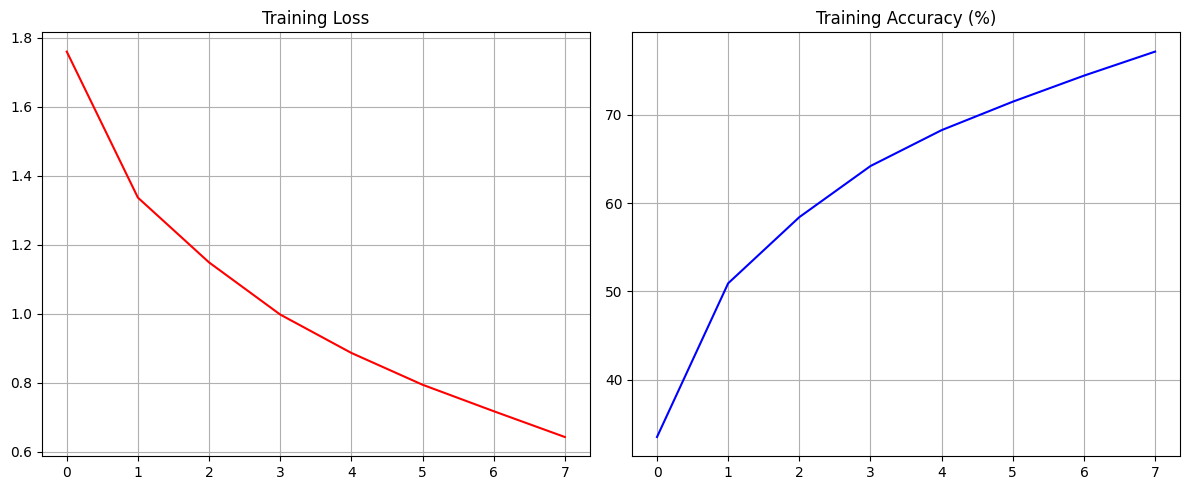

In [29]:
# ---------------------------------------------------------------
# 8️⃣ Training Curves
# ---------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(losses,'r-',label='Loss'); plt.title("Training Loss"); plt.grid(True)
plt.subplot(1,2,2); plt.plot(np.array(accs)*100,'b-',label='Accuracy'); plt.title("Training Accuracy (%)"); plt.grid(True)
plt.tight_layout(); plt.show()

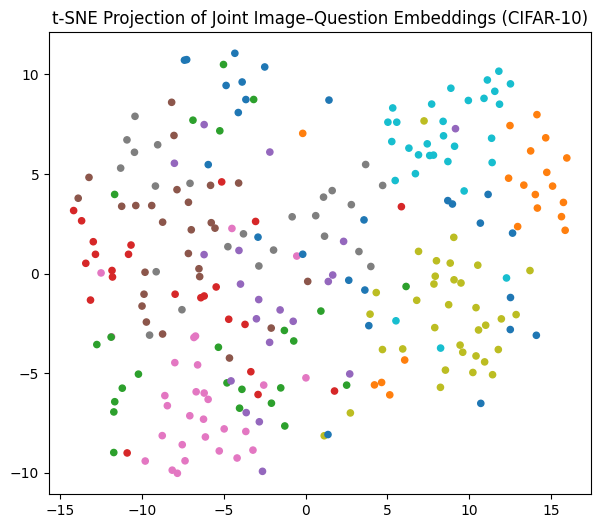

In [28]:
# ---------------------------------------------------------------
# 9️⃣ t-SNE Visualization of Joint Embeddings
# ---------------------------------------------------------------
model.eval()
imgs, labels = next(iter(testloader))
q = random_question_batch(imgs.size(0))
with torch.no_grad():
    v_map, v_flat = model.visual(imgs.to(device))
    q_repr, q_emb = model.text(q.to(device))
    Aq, Av, q_att, v_att = model.coatt(q_emb, v_flat)
    joint_emb = torch.cat([q_att, v_att], dim=1).cpu().numpy()
tsne = TSNE(n_components=2, random_state=42).fit_transform(joint_emb)
plt.figure(figsize=(7,6))
plt.scatter(tsne[:,0], tsne[:,1], c=labels, cmap="tab10", s=20)
plt.title("t-SNE Projection of Joint Image–Question Embeddings (CIFAR-10)")
plt.show()

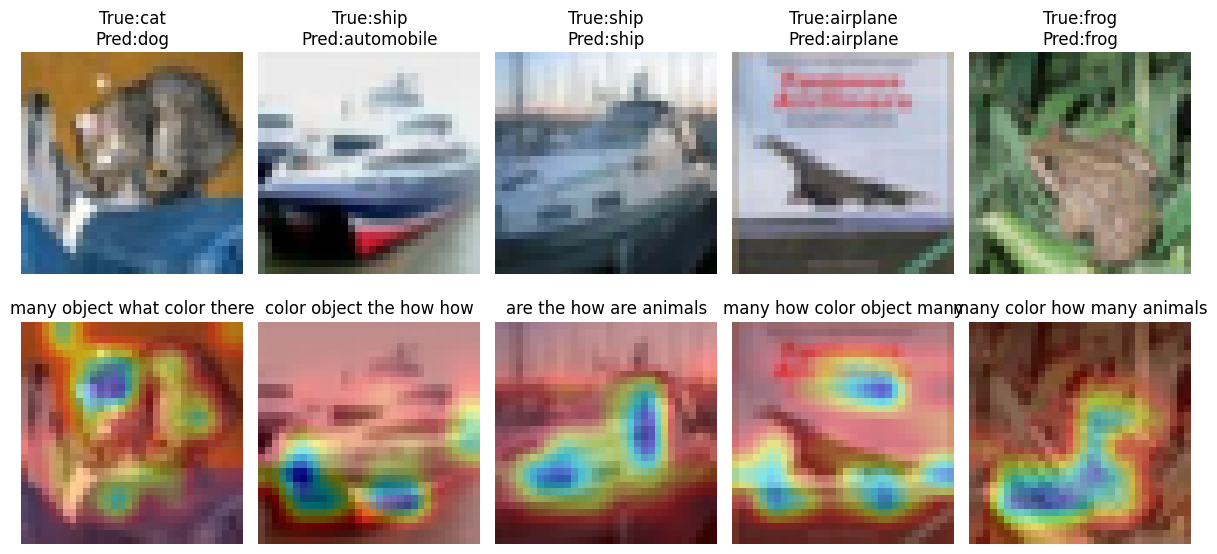

In [27]:
# ---------------------------------------------------------------
# 🔟 Paper-Style Attention Visualization
# ---------------------------------------------------------------
def visualize_attention(img, att_map, question_tokens):
    att_map = att_map.cpu().detach().numpy().reshape(8,8)
    att_map = (att_map - att_map.min()) / (att_map.max()-att_map.min()+1e-8)
    att_map = cv2.resize(att_map, (32,32))
    heatmap = cv2.applyColorMap((att_map*255).astype(np.uint8), cv2.COLORMAP_JET)
    img = np.transpose(img.cpu().numpy(), (1,2,0))
    img = ((img*0.5+0.5)*255).astype(np.uint8)
    overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    plt.imshow(overlay)
    plt.title(" ".join([vocab[t] for t in question_tokens]))
    plt.axis("off")

model.eval()
imgs, labels = next(iter(testloader))
q = random_question_batch(imgs.size(0))
with torch.no_grad():
    out, Aq, Av, v_map = model(imgs.to(device), q.to(device))
preds = out.argmax(1)

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(np.transpose(imgs[i].numpy(),(1,2,0))*0.5+0.5)
    plt.title(f"True:{classes[labels[i]]}\nPred:{classes[preds[i]]}")
    plt.axis("off")

    plt.subplot(2,5,i+6)
    visualize_attention(imgs[i], Av[i].mean(0), q[i])
plt.tight_layout(); plt.show()